In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [127]:
Data = pd.read_csv('./Watch_Features_Full.csv')
Meta = pd.read_csv('./Metadata.csv')

In [181]:
Data.shape

(121465, 81)

In [128]:
Data.head()

,RMSX,RMSY,RMSZ,rangeX,rangeY,rangeZ,meanX,meanY,meanZ,varX,...,Pdom_rel_mag,PSD_mean_mag,PSD_std_mag,PSD_skew_mag,PSD_kur_mag,jerk_mean_mag,jerk_std_mag,jerk_skew_mag,jerk_kur_mag,ID
0,0.000074,0.000082,0.000081,0.030553,0.029340,0.028807,-0.000006,-0.000017,1.026619e-05,0.002870,...,0.203389,6.272033e-07,1.891230e-06,5.837888,38.086612,-1.618017e-06,0.003908,0.045758,2.562344,00195693-95f6-4ee7-94eb-366c2963b5c3
1,0.000056,0.000066,0.000055,0.018877,0.018267,0.016651,0.000002,0.000008,1.529295e-05,0.002154,...,0.079906,3.481453e-07,6.543524e-07,2.646385,6.249822,-1.505870e-06,0.003090,0.045796,0.688963,00195693-95f6-4ee7-94eb-366c2963b5c3
2,0.000067,0.000080,0.000065,0.022141,0.022254,0.018988,-0.000001,0.000025,-7.708126e-06,0.002588,...,0.105608,5.752197e-07,1.224423e-06,3.205763,10.612107,-4.364062e-07,0.003800,-0.073022,0.820442,00195693-95f6-4ee7-94eb-366c2963b5c3
3,0.000068,0.000109,0.000117,0.027901,0.058374,0.074973,-0.000004,0.000004,-1.207512e-05,0.002627,...,0.089595,7.111670e-07,1.141293e-06,3.149749,11.517618,2.822701e-06,0.004139,0.135194,2.450584,00195693-95f6-4ee7-94eb-366c2963b5c3
4,0.000058,0.000071,0.000061,0.018342,0.040055,0.035330,0.000004,-0.000003,8.239709e-07,0.002237,...,0.113744,4.197550e-07,8.757321e-07,3.743618,13.957902,-1.630992e-06,0.003564,0.480899,8.002096,00195693-95f6-4ee7-94eb-366c2963b5c3


In [129]:
Meta.head()

,measurement_id,subject_id,timestamp,activity_intensity,dyskinesia,on_off,tremor,activity_intensity_reported_timestamp,dyskinesia_reported_timestamp,on_off_reported_timestamp,tremor_reported_timestamp
0,666f627b-0e7e-4170-ae6b-2868659d31e5,1000,1497528000000,0.0,0.0,1,0.0,1.497548e+12,1.497548e+12,1497547973973,1.497548e+12
1,6d9d19a3-c8c7-4d2c-8713-ae28824b8e43,1000,1497529800000,0.0,0.0,0,0.0,1.497548e+12,1.497548e+12,1497547997789,1.497548e+12
2,ae861cd1-da40-4697-b6fb-7e3844085cbf,1000,1497531600000,0.0,0.0,0,0.0,1.497548e+12,1.497548e+12,1497548009659,1.497548e+12
3,c228e60a-de21-4595-9d55-d5cf6891d8af,1000,1497533400000,0.0,0.0,0,0.0,1.497548e+12,1.497548e+12,1497548026985,1.497548e+12
4,59db02c8-69e1-41a9-94aa-0a58157888fc,1000,1497535200000,0.0,0.0,0,0.0,1.497548e+12,1.497548e+12,1497548037136,1.497548e+12


In [182]:
Meta.subject_id.unique()

array([1000, 1004, 1006, 1007, 1011, 1016, 1018, 1019, 1020, 1022, 1023,
       1030, 1032, 1034, 1036, 1038, 1039, 1041, 1043, 1044, 1046, 1047,
       1048, 1049, 1051], dtype=int64)

In [131]:
Meta.index = Meta.measurement_id

In [132]:
Data['subject_id']=Data.ID.apply(lambda x: Meta.loc[x,'subject_id'])
Data['timestamp']=Data.ID.apply(lambda x: Meta.loc[x,'timestamp'])
Data['activity_intensity']=Data.ID.apply(lambda x: Meta.loc[x,'activity_intensity'])
Data['dyskinesia']=Data.ID.apply(lambda x: Meta.loc[x,'dyskinesia'])
Data['on_off']=Data.ID.apply(lambda x: Meta.loc[x,'on_off'])
Data['tremor']=Data.ID.apply(lambda x: Meta.loc[x,'tremor'])

In [133]:
Data.head()

,RMSX,RMSY,RMSZ,rangeX,rangeY,rangeZ,meanX,meanY,meanZ,varX,...,jerk_std_mag,jerk_skew_mag,jerk_kur_mag,ID,subject_id,timestamp,activity_intensity,dyskinesia,on_off,tremor
0,0.000074,0.000082,0.000081,0.030553,0.029340,0.028807,-0.000006,-0.000017,1.026619e-05,0.002870,...,0.003908,0.045758,2.562344,00195693-95f6-4ee7-94eb-366c2963b5c3,1051,1511803800000,0.0,0.0,0,0.0
1,0.000056,0.000066,0.000055,0.018877,0.018267,0.016651,0.000002,0.000008,1.529295e-05,0.002154,...,0.003090,0.045796,0.688963,00195693-95f6-4ee7-94eb-366c2963b5c3,1051,1511803800000,0.0,0.0,0,0.0
2,0.000067,0.000080,0.000065,0.022141,0.022254,0.018988,-0.000001,0.000025,-7.708126e-06,0.002588,...,0.003800,-0.073022,0.820442,00195693-95f6-4ee7-94eb-366c2963b5c3,1051,1511803800000,0.0,0.0,0,0.0
3,0.000068,0.000109,0.000117,0.027901,0.058374,0.074973,-0.000004,0.000004,-1.207512e-05,0.002627,...,0.004139,0.135194,2.450584,00195693-95f6-4ee7-94eb-366c2963b5c3,1051,1511803800000,0.0,0.0,0,0.0
4,0.000058,0.000071,0.000061,0.018342,0.040055,0.035330,0.000004,-0.000003,8.239709e-07,0.002237,...,0.003564,0.480899,8.002096,00195693-95f6-4ee7-94eb-366c2963b5c3,1051,1511803800000,0.0,0.0,0,0.0


In [187]:
Data.subject_id.unique()

array([1051, 1032, 1038, 1049, 1044, 1030, 1016, 1018, 1039, 1006, 1041,
       1020, 1007, 1034, 1004, 1023, 1019, 1048, 1046, 1043, 1000, 1022],
      dtype=int64)

## On/Off

In [253]:
ground_truth = np.array([]); preds = np.array([])
for s in Data.subject_id.unique():
    print(s)
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.sort_values(by='timestamp',inplace=True)
    SubjData = SubjData[SubjData.on_off>-1]
    X = SubjData.iloc[:,:-7].values
    Y = SubjData.on_off.values
    # Limit to 0,1,2
    #Y[Y>2]=2
    X_train = X[:int(len(X)*.9),:];X_test = X[int(len(X)*.9):,:]
    Y_train = Y[:int(len(Y)*.9)];Y_test = Y[int(len(Y)*.9):]
    IDs = SubjData.ID.values[int(len(Y)*.9):]
    
    if len(np.unique(Y_train))>1:
        model = RandomForestClassifier(n_estimators=20,random_state=2)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        probs = model.predict_proba(X_test)
        
        lab = model.classes_
        
        if len(np.unique(Y_test))>1 and len(np.unique(Y_test))<=len(lab):

            ## Bin probabilities over each diary entry
            probs_bin = []; ground_truth_bin = []
            for ID in np.unique(IDs):
                probs_bin.append(np.mean(probs[IDs==ID,:],axis=0).reshape([1,-1]))
                ground_truth_bin.append(np.mean(Y_test[IDs==ID]))
            
            probs_bin=np.vstack(probs_bin); ground_truth_bin = np.vstack(ground_truth_bin)

            Y_test = label_binarize(Y_test,lab)
            ground_truth_bin = label_binarize(ground_truth_bin,lab)
            
            ## drop probabilities for classes not found in test data
            for i in list(range(np.shape(Y_test)[1]))[::-1]:
                if not any(ground_truth_bin[:,i]):
                    ind = np.argmax(lab==i)
                    probs = np.delete(probs,i,axis=1)
                    probs_bin = np.delete(probs_bin,i,axis=1)
                    Y_test = np.delete(Y_test,i,axis=1)
                    ground_truth_bin = np.delete(ground_truth_bin,i,axis=1)

            if len(lab)>2:
                print(roc_auc_score(Y_test,probs,average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs,average=None))

                print(roc_auc_score(ground_truth_bin,probs_bin,average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs,average=None))

            ##
            elif len(lab)==2:
                print(roc_auc_score(Y_test,probs[:,0],average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs[:,0],average=None))

                print(roc_auc_score(ground_truth_bin,probs_bin[:,0],average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs_bin[:,0],average=None))
                    
        elif len(np.unique(Y_test))>len(lab):
            print('Too many classes in test data')
        else:
            print('Not enough classes in test data')
    else:
        print('Not enough classes in training data')


1051
0.6122655258589312
0.8344855967078189
1032
0.497012524497903
0.4492763772175537
1038
0.6766395241934894
0.823939393939394
1049
0.5772624890654916
0.6416666666666667
1044
0.505089058524173
0.4761904761904762
1030
Not enough classes in training data
1016
Not enough classes in training data
1018
Not enough classes in test data
1039
0.5101002263342371
0.4753968253968254
1006
Too many classes in test data
1041
Not enough classes in test data
1020
0.6394177836530481
0.8793706293706294
1007
0.5196132994570751
0.5478801169590644
1034
0.5103152714437545
0.65
1004
0.54466759342127
0.5833333333333333
1023
0.5081000847597009
0.5254298941798942
1019
0.7107992893336977
0.8333333333333334
1048
0.6105611339824296
0.730969030969031
1046
0.5022775635057853
0.5
1043
0.7872757177033494
0.95
1000
Not enough classes in test data
1022
Not enough classes in training data


In [228]:
raw_auc = [0.6122655258589312, 0.497012524497903, 0.6766395241934894, 0.5772624890654916, 0.505089058524173, 
           0.5101002263342371, 0.6394177836530481, 0.5196132994570751, 0.5103152714437545, 0.54466759342127, 
           0.5081000847597009, 0.7107992893336977, 0.6105611339824296, 0.5022775635057853, 0.7872757177033494]

bin_auc = [0.8344855967078189, 0.4492763772175537, 0.823939393939394, 0.6416666666666667, 0.4761904761904762, 
           0.4753968253968254, 0.8793706293706294, 0.5478801169590644, 0.65, 0.5833333333333333, 0.5254298941798942, 
           0.8333333333333334, 0.730969030969031, 0.5, 0.95]

In [229]:
## Raw result
m = np.mean(raw_auc)
s = scipy.stats.sem(raw_auc)
print(m,m-1.98*s) # mean and lower-bound of 95% CI

0.5807598057156225 0.5347769617055079


In [230]:
## Diary binning result
m = np.mean(bin_auc)
s = scipy.stats.sem(bin_auc)
print(m,m-1.98*s) # mean and lower-bound of 95% CI

0.660084778284268 0.5737257787581878


In [231]:
scipy.stats.ttest_rel(raw_auc,bin_auc)

Ttest_relResult(statistic=-3.3068624906298343, pvalue=0.00519092037311864)

## Dyskinesia

In [232]:
ground_truth = np.array([]); preds = np.array([])
for s in Data.subject_id.unique():
    print(s)
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.sort_values(by='timestamp',inplace=True)
    SubjData = SubjData[SubjData.on_off>-1]
    X = SubjData.iloc[:,:-7].values
    Y = SubjData.dyskinesia.values
    X_train = X[:int(len(X)*.9),:];X_test = X[int(len(X)*.9):,:]
    Y_train = Y[:int(len(Y)*.9)];Y_test = Y[int(len(Y)*.9):]
    IDs = SubjData.ID.values[int(len(Y)*.9):]
    
    if len(np.unique(Y_train))>1:
        model = RandomForestClassifier(n_estimators=20,random_state=2)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        probs = model.predict_proba(X_test)
        
        lab = model.classes_
        
        if len(np.unique(Y_test))>1 and len(np.unique(Y_test))<=len(lab):

            ## Bin probabilities over each diary entry
            probs_bin = []; ground_truth_bin = []
            for ID in np.unique(IDs):
                probs_bin.append(np.mean(probs[IDs==ID,:],axis=0).reshape([1,-1]))
                ground_truth_bin.append(np.mean(Y_test[IDs==ID]))
            
            probs_bin=np.vstack(probs_bin); ground_truth_bin = np.vstack(ground_truth_bin)

            Y_test = label_binarize(Y_test,lab)
            ground_truth_bin = label_binarize(ground_truth_bin,lab)
            
            ## drop probabilities for classes not found in test data
            for i in list(range(np.shape(Y_test)[1]))[::-1]:
                if not any(ground_truth_bin[:,i]):
                    ind = np.argmax(lab==i)
                    probs = np.delete(probs,i,axis=1)
                    probs_bin = np.delete(probs_bin,i,axis=1)
                    Y_test = np.delete(Y_test,i,axis=1)
                    ground_truth_bin = np.delete(ground_truth_bin,i,axis=1)

            if len(lab)>2:
                print(roc_auc_score(Y_test,probs,average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs,average=None))

                print(roc_auc_score(ground_truth_bin,probs_bin,average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs,average=None))

            ##
            elif len(lab)==2:
                print(roc_auc_score(Y_test,probs[:,0],average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs[:,0],average=None))

                print(roc_auc_score(ground_truth_bin,probs_bin[:,0],average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs_bin[:,0],average=None))
                    
        elif len(np.unique(Y_test))>len(lab):
            print('Too many classes in test data')
        else:
            print('Not enough classes in test data')
    else:
        print('Not enough classes in training data')


1051
Not enough classes in test data
1032
Not enough classes in training data
1038
Not enough classes in test data
1049
0.4978134315591245
0.47222222222222215
1044
Not enough classes in test data
1030
Not enough classes in training data
1016
Not enough classes in training data
1018
Not enough classes in training data
1039
0.46584783094635684
0.4743282498184459
1006
Not enough classes in training data
1041
Not enough classes in training data
1020
Not enough classes in training data
1007
0.5337899470752676
0.6671408250355618
1034
0.5645252935974029
0.6222222222222221
1004
0.5528590319567228
0.6944444444444445
1023
0.5628169691003799
0.6393769629063747
1019
0.6168678118626606
0.8333333333333334
1048
0.39537167239435467
0.3496031746031746
1046
Not enough classes in test data
1043
0.8928289473684211
0.95
1000
Not enough classes in training data
1022
Not enough classes in training data


In [233]:
raw_auc = [0.4978134315591245, 0.46584783094635684, 0.5337899470752676, 0.5645252935974029, 0.5528590319567228, 
           0.5628169691003799, 0.6168678118626606, 0.39537167239435467, 0.8928289473684211]

bin_auc = [0.47222222222222215, 0.4743282498184459, 0.6671408250355618, 0.6222222222222221, 0.6944444444444445, 
           0.6393769629063747, 0.8333333333333334, 0.3496031746031746, 0.95]

In [234]:
## Raw result
m = np.mean(raw_auc)
s = scipy.stats.sem(raw_auc)
print(m,m-1.98*s) # mean and lower-bound of 95% CI

0.564746770651188 0.4730545826231837


In [235]:
## Raw result
m = np.mean(bin_auc)
s = scipy.stats.sem(bin_auc)
print(m,m-1.98*s) # mean and lower-bound of 95% CI

0.6336301593984199 0.5108061518380327


In [236]:
scipy.stats.ttest_rel(raw_auc,bin_auc)

Ttest_relResult(statistic=-2.4425642216240004, pvalue=0.04040258816848452)

## Tremor

In [256]:
ground_truth = np.array([]); preds = np.array([])
for s in Data.subject_id.unique():
    print(s)
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.sort_values(by='timestamp',inplace=True)
    SubjData = SubjData[SubjData.on_off>-1]
    X = SubjData.iloc[:,:-7].values
    Y = SubjData.tremor.values
    Y[Y>1]=1
    X_train = X[:int(len(X)*.9),:];X_test = X[int(len(X)*.9):,:]
    Y_train = Y[:int(len(Y)*.9)];Y_test = Y[int(len(Y)*.9):]
    IDs = SubjData.ID.values[int(len(Y)*.9):]
    
    if len(np.unique(Y_train))>1:
        model = RandomForestClassifier(n_estimators=20,random_state=2)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        probs = model.predict_proba(X_test)
        
        lab = model.classes_
        
        if len(np.unique(Y_test))>1 and len(np.unique(Y_test))<=len(lab):

            ## Bin probabilities over each diary entry
            probs_bin = []; ground_truth_bin = []
            for ID in np.unique(IDs):
                probs_bin.append(np.mean(probs[IDs==ID,:],axis=0).reshape([1,-1]))
                ground_truth_bin.append(np.mean(Y_test[IDs==ID]))
            
            probs_bin=np.vstack(probs_bin); ground_truth_bin = np.vstack(ground_truth_bin)

            Y_test = label_binarize(Y_test,lab)
            ground_truth_bin = label_binarize(ground_truth_bin,lab)
            
            ## drop probabilities for classes not found in test data
            for i in list(range(np.shape(Y_test)[1]))[::-1]:
                if not any(ground_truth_bin[:,i]):
                    ind = np.argmax(lab==i)
                    probs = np.delete(probs,i,axis=1)
                    probs_bin = np.delete(probs_bin,i,axis=1)
                    Y_test = np.delete(Y_test,i,axis=1)
                    ground_truth_bin = np.delete(ground_truth_bin,i,axis=1)

            if len(lab)>2:
                print(roc_auc_score(Y_test,probs,average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs,average=None))

                print(roc_auc_score(ground_truth_bin,probs_bin,average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs,average=None))

            ##
            elif len(lab)==2:
                print(roc_auc_score(Y_test,probs[:,0],average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs[:,0],average=None))

                print(roc_auc_score(ground_truth_bin,probs_bin[:,0],average='weighted'))
                ## print AUROC for each label 
                #print(roc_auc_score(label_binarize(Y_test,lab),probs_bin[:,0],average=None))
                    
        elif len(np.unique(Y_test))>len(lab):
            print('Too many classes in test data')
        else:
            print('Not enough classes in test data')
    else:
        print('Not enough classes in training data')


1051
Not enough classes in test data
1032
0.5768668668668668
0.674074074074074
1038
0.3338373655913978
0.06666666666666667
1049
Not enough classes in test data
1044
Not enough classes in training data
1030
Not enough classes in training data
1016
0.40570175438596495
0.19999999999999996
1018
Not enough classes in training data
1039
0.4976803221288516
0.47058823529411764
1006
Not enough classes in test data
1041
Not enough classes in test data
1020
0.4517378111581182
0.36363636363636365
1007
0.483271800281294
0.37739463601532564
1034
0.5282155797101449
0.5
1004
Not enough classes in test data
1023
0.4197710073068893
0.109375
1019
Not enough classes in test data
1048
Not enough classes in training data
1046
Not enough classes in test data
1043
0.3297727272727273
0.16666666666666666
1000
Not enough classes in test data
1022
Not enough classes in training data


In [242]:
raw_auc = [0.4225849563389757, 0.5971648276793048, 0.5739765442177425, 0.40570175438596495, 0.4976803221288516, 
           0.527301023039698, 0.5111569507252405, 0.4805223537360696, 0.5409254768413324, 0.5120411156199407, 
           0.45914920306901585, 0.6192464552318847, 0.7677900717703349]

bin_auc = [0.3305555555555556, 0.6683622828784118, 0.7133838383838386, 0.19999999999999996, 0.47058823529411764, 
           0.5680618401206636, 0.5716295242611033, 0.4166666666666667, 0.6770833333333334, 0.5, 0.4890873015873016, 
           1.0, 0.8833333333333334]

In [243]:
## Raw result
m = np.mean(raw_auc)
s = scipy.stats.sem(raw_auc)
print(m,m-1.98*s) # mean and lower-bound of 95% CI

0.5319416195987967 0.48003531163971824


In [244]:
## Raw result
m = np.mean(bin_auc)
s = scipy.stats.sem(bin_auc)
print(m,m-1.98*s) # mean and lower-bound of 95% CI

0.5760578393395636 0.4570694715165355


In [245]:
scipy.stats.ttest_rel(raw_auc,bin_auc)

Ttest_relResult(statistic=-1.1294190986169828, pvalue=0.28079274160307294)

## Extra Code

1038
1044
0.5335400763358779
1018
1006
1019
0.18831658291457287
1048
1046
0.48831294055060515
1000
0.6539248993213584


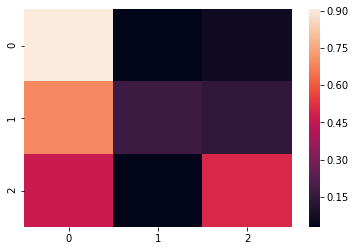

In [155]:
ground_truth = np.array([]); preds = np.array([])
for s in Data.subject_id.unique():
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.sort_values(by='timestamp',inplace=True)
    SubjData = SubjData[SubjData.on_off>-1]
    X = SubjData.iloc[:,:-7].values
    Y = SubjData.on_off.values;Y[Y>2]=2
    X_train = X[:int(len(X)*.9),:];X_test = X[int(len(X)*.9):,:]
    Y_train = Y[:int(len(Y)*.9)];Y_test = Y[int(len(Y)*.9):]
    
    if len(np.unique(Y_train))==2:
        print(s)
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        probs = model.predict_proba(X_test)
        
        lab = sorted(np.unique(Y_train))
        if len(np.unique(Y_test))==len(lab):
            print(roc_auc_score(label_binarize(Y_test,lab),probs[:,1],average='weighted'))
#             print(roc_auc_score(label_binarize(Y_test,lab),label_binarize(p,lab),average=None))
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
# print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

In [71]:
np.unique(ground_truth)

array([-1.,  0.,  1.])

[0.0, 1.0]
0.5808015513897867
[0.0, 1.0]
0.5495466321243523
[0.0, 1.0]
0.4874031986531986
[0.0, 1.0]
0.4990059642147117
0.824743363729464


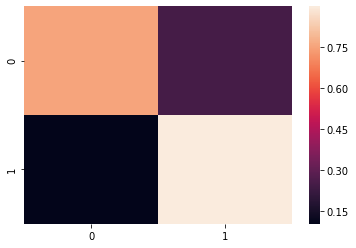

In [88]:
ground_truth = np.array([]); preds = np.array([])
for s in Data.subject_id.unique():
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.sort_values(by='timestamp',inplace=True)
    SubjData.drop(labels=['ID', 'subject_id', 'timestamp', 'dyskinesia', 'on_off', 'tremor'],
                  axis=1,inplace=True)
    SubjData.dropna(inplace=True)
    X = SubjData.iloc[:,:-1].values
    Y = SubjData.activity_intensity.values;Y[Y>1]=1
    X_train = X[:int(len(X)*.9),:];X_test = X[int(len(X)*.9):,:]
    Y_train = Y[:int(len(Y)*.9)];Y_test = Y[int(len(Y)*.9):]
    
    if len(Y_train)>0:
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        
        lab = sorted(np.unique(Y_test))
        if len(lab)>1:
            print(lab)
            print(roc_auc_score(label_binarize(Y_test,lab),label_binarize(p,lab),average='weighted'))
#             print(roc_auc_score(label_binarize(Y_test,lab),label_binarize(p,lab),average=None))
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
# print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

2
1
2
2
2
1
1
1
2
1
1
1
2
2
2
2
2
2
2
2
1
0
0.8735108753476962


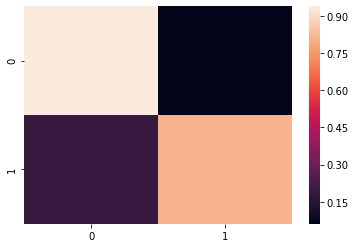

In [92]:
ground_truth = np.array([]); preds = np.array([])
for s in Data.subject_id.unique():
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.sort_values(by='timestamp',inplace=True)
    SubjData.drop(labels=['ID', 'subject_id', 'timestamp', 'activity_intensity', 'on_off', 'tremor'],
                  axis=1,inplace=True)
    SubjData.dropna(inplace=True)
    X = SubjData.iloc[:,:-1].values
    Y = SubjData.dyskinesia.values;Y[Y>1]=1
    X_train = X[:int(len(X)*.9),:];X_test = X[int(len(X)*.9):,:]
    Y_train = Y[:int(len(Y)*.9)];Y_test = Y[int(len(Y)*.9):]
    
    print(len(np.unique(Y)))
    
    if len(Y_train)>0:
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        
        lab = sorted(np.unique(Y_test))
#         if len(lab)>1:
#             print(lab)
#             print(roc_auc_score(label_binarize(Y_test,lab),label_binarize(p,lab),average='weighted'))
#             print(roc_auc_score(label_binarize(Y_test,lab),label_binarize(p,lab),average=None))
#         else:
#             print(s)
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
# print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

[0.0, 1.0]
0.43536786786786785
0.43536786786786785
[0.0, 1.0]
0.5
0.5
[0.0, 1.0]
0.5
0.5
[0.0, 1.0]
0.5
0.5
[0.0, 1.0]
0.5
0.5
[0.0, 1.0]
0.4980546507419471
0.4980546507419471
[0.0, 1.0]
0.5513586956521739
0.5513586956521739
[0.0, 1.0]
0.5092967118997913
0.5092967118997913
[0.0, 1.0]
0.5380681818181818
0.5380681818181818
0.7864427762120331
0.7864427762120331


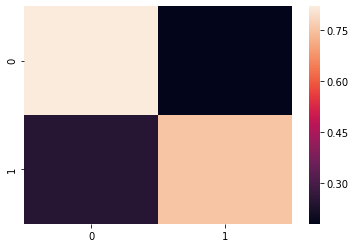

In [86]:
ground_truth = np.array([]); preds = np.array([])
for s in Data.subject_id.unique():
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.sort_values(by='timestamp',inplace=True)
    SubjData.drop(labels=['ID', 'subject_id', 'timestamp', 'dyskinesia', 'on_off', 'activity_intensity'],
                  axis=1,inplace=True)
    SubjData.dropna(inplace=True)
    X = SubjData.iloc[:,:-1].values
    Y = SubjData.tremor.values;Y[Y>1]=1
    X_train = X[:int(len(X)*.9),:];X_test = X[int(len(X)*.9):,:]
    Y_train = Y[:int(len(Y)*.9)];Y_test = Y[int(len(Y)*.9):]
    
    if len(Y_train)>0:
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        
        lab = sorted(np.unique(Y_test))
        if len(lab)>1:
            print(lab)
            print(roc_auc_score(label_binarize(Y_test,lab),label_binarize(p,lab),average='weighted'))
            print(roc_auc_score(label_binarize(Y_test,lab),label_binarize(p,lab),average=None))
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

0.4962487914528457
0.42020171092430747


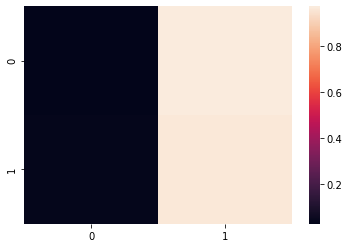

In [125]:
ground_truth = np.array([]); preds = np.array([]); IDs = np.array([])
for s in Data.subject_id.unique():
    TrainData = Data[Data.subject_id!=s].copy()
    TrainData.drop(labels=['subject_id', 'timestamp', 'tremor', 'on_off', 'dyskinesia'],
                   axis=1,inplace=True)
    TrainData.dropna(inplace=True)
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.drop(labels=['subject_id', 'timestamp', 'tremor', 'on_off', 'dyskinesia'],
                  axis=1,inplace=True)
    SubjData.dropna(inplace=True)
    X_train = TrainData.values[:,:-2];X_test = SubjData.values[:,:-2]
    Y_train = TrainData.activity_intensity.values;Y_test = SubjData.activity_intensity.values
    Y_train[Y_train>1]=1;Y_test[Y_test>1]=1
    
    ID = SubjData.ID.values
    
    if len(Y_train)>0 and len(Y_test)>0:
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        IDs = np.concatenate([IDs,ID])
        
        lab = sorted(np.unique(Y_train))
#         if len(np.unique(Y_test))>1:
#             print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test),average='weighted'))
#             print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test)[:,0],average=None))
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
# print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

print(roc_auc_score([np.mean(ground_truth[IDs==ID]) for ID in np.unique(IDs)],
                    [np.mean(preds[IDs==ID]) for ID in np.unique(IDs)]))

0.500243921028563
0.5033655022202567
0.47825877782805015
0.5303163611011495
0.5131587470891433
0.5543692467596619
0.5073686483761128
0.5469748186145708
0.54742578125
0.5416087771497216
0.51871955609652
0.49507099022259204
0.5207609741395535
0.5159736622073579
0.5034586725275229
0.3690232332488814
0.5043365651578902
0.5486683419511513
0.533294084064797
0.4523510559958134
0.3259121090474969


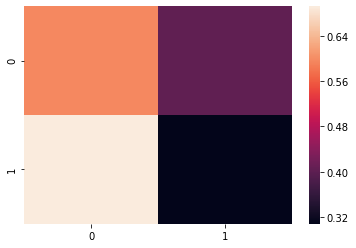

In [119]:
ground_truth = np.array([]); preds = np.array([]); IDs = np.array([])
for s in Data.subject_id.unique():
    TrainData = Data[Data.subject_id!=s].copy()
    TrainData.drop(labels=['subject_id', 'timestamp', 'tremor', 'dyskinesia', 'activity_intensity'],
                   axis=1,inplace=True)
    TrainData.dropna(inplace=True)
    TrainData = TrainData[TrainData.on_off>-1]
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.drop(labels=['subject_id', 'timestamp', 'tremor', 'dyskinesia', 'activity_intensity'],
                  axis=1,inplace=True)
    SubjData.dropna(inplace=True)
    SubjData = SubjData[SubjData.on_off>-1]
    X_train = TrainData.values[:,:-2];X_test = SubjData.values[:,:-2]
    Y_train = TrainData.on_off.values;Y_test = SubjData.on_off.values
    Y_train[Y_train>1]=1;Y_test[Y_test>1]=1
    
    ID = SubjData.ID.values
    
    if len(Y_train)>0 and len(Y_test)>0:
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        IDs = np.concatenate([IDs,ID])
        
        lab = sorted(np.unique(Y_test))
        if len(lab)>1:
            print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test)[:,0],average='weighted'))
#             print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test)[:,0],average=None))
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
# print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

print(roc_auc_score([np.mean(ground_truth[IDs==ID]) for ID in np.unique(IDs)],
                    [np.mean(preds[IDs==ID]) for ID in np.unique(IDs)]))

0.5573496383100827
0.458656811833331
0.4739289234141034
0.4858231994403939
0.49394818728340545
0.5711792102891654
0.46814120631341605
0.5516785366970312
0.4824895543175488
0.5086302363768282
0.4269304682040531
0.5522643121617773
0.4883603908072071
0.49115330725469714
0.43222532861218665


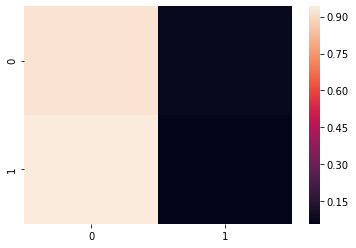

In [116]:
ground_truth = np.array([]); preds = np.array([]); IDs = np.array([])
for s in Data.subject_id.unique():
    TrainData = Data[Data.subject_id!=s].copy()
    TrainData.drop(labels=['subject_id', 'timestamp', 'tremor', 'on_off', 'activity_intensity'],
                   axis=1,inplace=True)
    TrainData.dropna(inplace=True)
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.drop(labels=['subject_id', 'timestamp', 'tremor', 'on_off', 'activity_intensity'],
                  axis=1,inplace=True)
    SubjData.dropna(inplace=True)
    X_train = TrainData.values[:,:-2];X_test = SubjData.values[:,:-2]
    Y_train = TrainData.dyskinesia.values;Y_test = SubjData.dyskinesia.values
    Y_train[Y_train>1]=1;Y_test[Y_test>1]=1
    
    ID = SubjData.ID.values
    
    if len(Y_train)>0 and len(Y_test)>0:
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        IDs = np.concatenate([IDs,ID])
        
        lab = sorted(np.unique(Y_test))
        if len(lab)>1:
            print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test)[:,0],average='weighted'))
#             print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test)[:,0],average=None))
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
# print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

print(roc_auc_score([np.mean(ground_truth[IDs==ID]) for ID in np.unique(IDs)],
                    [np.mean(preds[IDs==ID]) for ID in np.unique(IDs)]))

0.5563338256765474
0.4733649344325349
0.35306861762398667
0.4595688234082011
0.4959605823863637
0.45187678060666314
0.49623950686119633
0.5905208333333334
0.5160701762075918
0.4904979331621903
0.545312341289995
0.49579784245934055
0.4933136701217387
0.47330009970089737
0.532157770820192
0.586294048636357
0.35485195060342406
0.5602981937027284
0.6649295585256736


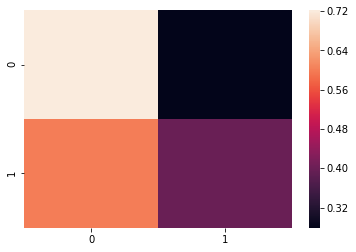

In [122]:
ground_truth = np.array([]); preds = np.array([]); IDs = np.array([])
for s in Data.subject_id.unique():
    TrainData = Data[Data.subject_id!=s].copy()
    TrainData.drop(labels=['subject_id', 'timestamp', 'dyskinesia', 'on_off', 'activity_intensity'],
                   axis=1,inplace=True)
    TrainData.dropna(inplace=True)
    SubjData = Data[Data.subject_id==s].copy()
    SubjData.drop(labels=['subject_id', 'timestamp', 'dyskinesia', 'on_off', 'activity_intensity'],
                  axis=1,inplace=True)
    SubjData.dropna(inplace=True)
    X_train = TrainData.values[:,:-2];X_test = SubjData.values[:,:-2]
    Y_train = TrainData.tremor.values;Y_test = SubjData.tremor.values
    Y_train[Y_train>1]=1;Y_test[Y_test>1]=1
    
    ID = SubjData.ID.values
    
    if len(Y_train)>0 and len(Y_test)>0:
        model = RandomForestClassifier(n_estimators=20)
        model.fit(X_train,Y_train)
        p = model.predict(X_test)
        ground_truth = np.concatenate([ground_truth,Y_test])
        preds = np.concatenate([preds,p])
        IDs = np.concatenate([IDs,ID])
        
        lab = sorted(np.unique(Y_test))
        if len(lab)>1:
            print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test)[:,0],average='weighted'))
#             print(roc_auc_score(label_binarize(Y_test,lab),model.predict_proba(X_test)[:,0],average=None))
    
#     roc_auc_score()

lab = sorted(np.unique(ground_truth))

cmat = confusion_matrix(ground_truth,preds,labels = lab)
sns.heatmap(cmat/np.sum(cmat,axis=1).reshape([-1,1]))
print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average='weighted'))
# print(roc_auc_score(label_binarize(ground_truth,lab),label_binarize(preds,lab),average=None))

print(roc_auc_score([np.mean(ground_truth[IDs==ID]) for ID in np.unique(IDs)],
                    [np.mean(preds[IDs==ID]) for ID in np.unique(IDs)]))

In [114]:
roc_auc_score([np.mean(ground_truth[IDs==ID]) for ID in np.unique(IDs)],
              [np.mean(preds[IDs==ID]) for ID in np.unique(IDs)])

0.657882843133135

In [110]:
SubjData.head()

,RMSX,RMSY,RMSZ,rangeX,rangeY,rangeZ,meanX,meanY,meanZ,varX,...,PSD_mean_mag,PSD_std_mag,PSD_skew_mag,PSD_kur_mag,jerk_mean_mag,jerk_std_mag,jerk_skew_mag,jerk_kur_mag,ID,tremor
0,0.000074,0.000082,0.000081,0.030553,0.029340,0.028807,-0.000006,-0.000017,1.026619e-05,0.002870,...,6.272033e-07,1.891230e-06,5.837888,38.086612,-1.618017e-06,0.003908,0.045758,2.562344,00195693-95f6-4ee7-94eb-366c2963b5c3,0.0
1,0.000056,0.000066,0.000055,0.018877,0.018267,0.016651,0.000002,0.000008,1.529295e-05,0.002154,...,3.481453e-07,6.543524e-07,2.646385,6.249822,-1.505870e-06,0.003090,0.045796,0.688963,00195693-95f6-4ee7-94eb-366c2963b5c3,0.0
2,0.000067,0.000080,0.000065,0.022141,0.022254,0.018988,-0.000001,0.000025,-7.708126e-06,0.002588,...,5.752197e-07,1.224423e-06,3.205763,10.612107,-4.364062e-07,0.003800,-0.073022,0.820442,00195693-95f6-4ee7-94eb-366c2963b5c3,0.0
3,0.000068,0.000109,0.000117,0.027901,0.058374,0.074973,-0.000004,0.000004,-1.207512e-05,0.002627,...,7.111670e-07,1.141293e-06,3.149749,11.517618,2.822701e-06,0.004139,0.135194,2.450584,00195693-95f6-4ee7-94eb-366c2963b5c3,0.0
4,0.000058,0.000071,0.000061,0.018342,0.040055,0.035330,0.000004,-0.000003,8.239709e-07,0.002237,...,4.197550e-07,8.757321e-07,3.743618,13.957902,-1.630992e-06,0.003564,0.480899,8.002096,00195693-95f6-4ee7-94eb-366c2963b5c3,0.0


In [108]:
np.unique(Y_train)

array([0.0, 1.0], dtype=object)

In [103]:
model.predict_proba(X_test)

array([[0.3 , 0.7 ],
       [0.75, 0.25],
       [0.7 , 0.3 ],
       ...,
       [0.65, 0.35],
       [0.2 , 0.8 ],
       [0.4 , 0.6 ]])

In [102]:
label_binarize(Y_test,lab)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [37]:
cmat = confusion_matrix(ground_truth,preds,labels = [-1,0,1,2,3,4])

In [50]:
cmat/np.sum(cmat,axis=1).reshape([-1,1])

array([[2.91730475e-01, 4.87748851e-01, 1.83001531e-01, 2.90964778e-02,
        7.65696784e-03, 7.65696784e-04],
       [3.92760878e-02, 8.65614170e-01, 6.12244898e-02, 2.46438198e-02,
        1.15517905e-03, 8.08625337e-03],
       [8.01024140e-02, 4.72201902e-01, 3.23335772e-01, 1.03511339e-01,
        1.90197513e-02, 1.82882224e-03],
       [4.64333782e-02, 4.32032301e-01, 2.83310902e-01, 1.79004038e-01,
        5.38358008e-02, 5.38358008e-03],
       [2.74656679e-02, 3.24594257e-01, 3.25842697e-01, 1.87265918e-01,
        1.28589263e-01, 6.24219725e-03],
       [9.79462875e-02, 4.24960506e-01, 2.43285940e-01, 1.57977883e-01,
        3.15955766e-02, 4.42338073e-02]])

In [47]:
np.sum(cmat,axis=1).reshape([-1,1])

array([[1306],
       [5194],
       [2734],
       [1486],
       [ 801],
       [ 633]], dtype=int64)